Load CSV Data

In [1]:
import pandas as pd
data_path = "../Data/Fish_Population.csv"
df = pd.read_csv(data_path)

df.head()

,Date,District,Total_Fish_Landing_Tonnes,Indian_Mackerel_Tonnes,Oil_Sardine_Tonnes,Horse_Mackerel_Tonnes,Lesser_Sardine_Tonnes,Sea_Surface_Temperature_C,Wave_Height_m,Wave_Period_s,Wind_Speed_mps,Salinity_PSU,Dissolved_Oxygen_mg_L,pH_Level,Air_Pressure_hPa,Chlorophyll_a_mg_m3
0,05-01-2019,Palghar,1977.08,930.47,581.49,680.67,692.87,30.24,1.10,10.14,13.47,35.98,6.40,8.11,1014.77,2.114
1,08-01-2019,Palghar,1082.94,1185.53,832.01,581.21,134.38,25.31,3.95,8.80,2.19,34.76,5.13,8.12,1009.65,1.262
2,12-01-2019,Mumbai,3848.23,1185.23,706.61,135.63,464.96,25.48,3.16,6.14,14.67,34.87,5.02,7.52,1008.58,0.848
3,13-01-2019,Thane,788.99,1138.39,187.26,646.74,484.56,24.98,3.49,4.91,7.41,34.30,5.96,8.42,1006.65,2.255
4,17-01-2019,Raigad,1050.84,201.06,136.10,791.43,321.86,30.65,3.12,4.46,8.23,35.84,5.19,8.27,1005.42,1.149


Find Missing Values

In [2]:
# Check data types
print(df.dtypes)

# Check missing values
print(df.isnull().sum())


Date                          object
District                      object
Total_Fish_Landing_Tonnes    float64
Indian_Mackerel_Tonnes       float64
Oil_Sardine_Tonnes           float64
Horse_Mackerel_Tonnes        float64
Lesser_Sardine_Tonnes        float64
Sea_Surface_Temperature_C    float64
Wave_Height_m                float64
Wave_Period_s                float64
Wind_Speed_mps               float64
Salinity_PSU                 float64
Dissolved_Oxygen_mg_L        float64
pH_Level                     float64
Air_Pressure_hPa             float64
Chlorophyll_a_mg_m3          float64
dtype: object
Date                         0
District                     0
Total_Fish_Landing_Tonnes    0
Indian_Mackerel_Tonnes       0
Oil_Sardine_Tonnes           0
Horse_Mackerel_Tonnes        0
Lesser_Sardine_Tonnes        0
Sea_Surface_Temperature_C    0
Wave_Height_m                0
Wave_Period_s                0
Wind_Speed_mps               0
Salinity_PSU                 0
Dissolved_Oxygen_mg_L 

Data PreProcessing

1️⃣ Convert Date to datetime format.

2️⃣ Extract Year, Month, and Day from the Date column.

3️⃣ Drop the District column for now (unless you want to use it as a categorical feature).

In [3]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract Year, Month, and Day as new columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop 'Date' and 'District' if not needed
df.drop(columns=['Date', 'District'], inplace=True)

# Display updated dataframe
df.head()


,Total_Fish_Landing_Tonnes,Indian_Mackerel_Tonnes,Oil_Sardine_Tonnes,Horse_Mackerel_Tonnes,Lesser_Sardine_Tonnes,Sea_Surface_Temperature_C,Wave_Height_m,Wave_Period_s,Wind_Speed_mps,Salinity_PSU,Dissolved_Oxygen_mg_L,pH_Level,Air_Pressure_hPa,Chlorophyll_a_mg_m3,Year,Month,Day
0,1977.08,930.47,581.49,680.67,692.87,30.24,1.10,10.14,13.47,35.98,6.40,8.11,1014.77,2.114,2019,1,5
1,1082.94,1185.53,832.01,581.21,134.38,25.31,3.95,8.80,2.19,34.76,5.13,8.12,1009.65,1.262,2019,1,8
2,3848.23,1185.23,706.61,135.63,464.96,25.48,3.16,6.14,14.67,34.87,5.02,7.52,1008.58,0.848,2019,1,12
3,788.99,1138.39,187.26,646.74,484.56,24.98,3.49,4.91,7.41,34.30,5.96,8.42,1006.65,2.255,2019,1,13
4,1050.84,201.06,136.10,791.43,321.86,30.65,3.12,4.46,8.23,35.84,5.19,8.27,1005.42,1.149,2019,1,17


In [4]:
# Define Features (X) and Targets (Y)
climate_features = [
    'Sea_Surface_Temperature_C', 'Wave_Height_m', 'Wave_Period_s',
    'Wind_Speed_mps', 'Salinity_PSU', 'Dissolved_Oxygen_mg_L',
    'pH_Level', 'Air_Pressure_hPa', 'Chlorophyll_a_mg_m3'
]

target_col = "Total_Fish_Landing_Tonnes"

X = df[climate_features]
y = df[target_col]

X.shape, y.shape

((413, 9), (413,))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Random Forest Model🌲

In [6]:
import pickle
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
pickle.dump(rf_model, open("model_rf.pkl", "wb"))


ANN Model

In [7]:
from keras.models import Sequential
from keras.layers import Dense

ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

ann_model.compile(optimizer='adam', loss='mse')
ann_model.fit(X_train_scaled, y_train, epochs=100, verbose=0)

y_pred_ann = ann_model.predict(X_test_scaled).flatten()
pickle.dump(ann_model, open("model_ann.pkl", "wb"))


C:\Users\Ruchi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


LSTM Model

Reshap the model

In [8]:
import numpy as np

def create_sequences(X, y, window_size):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:i + window_size])
        ys.append(y[i + window_size])
    return np.array(Xs), np.array(ys)

window_size = 5
X_seq, y_seq = create_sequences(X, y, window_size)

# Split into train and test
from sklearn.model_selection import train_test_split
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train
lstm_model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=16, verbose=1)

# Predict
y_pred_lstm = lstm_model.predict(X_test_seq).flatten()

# Save
import pickle
pickle.dump(lstm_model, open("output/lstm_model.pkl", "wb"))
np.save("output/y_pred_lstm.npy", y_pred_lstm)
np.save("output/y_test_lstm.npy", y_test_seq)


Epoch 1/50


C:\Users\Ruchi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 9204871.0000
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9286848.0000
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9386519.0000
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8986825.0000 
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9226274.0000
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9551794.0000 
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8876663.0000
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9685998.0000
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9482867.0000 
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9223555.0000 
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9895123.0000 
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9469571.0000 
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9967981.0000 
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8967472.0000
Epoch

Tranform Model

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Add

def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)

    # Multi-Head Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    attention_output = MultiHeadAttention(num_heads=2, key_dim=16)(x, x)
    x = Add()([x, attention_output])
    x = LayerNormalization(epsilon=1e-6)(x)
    
    # Feed Forward
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Build and train
transformer_model = build_transformer_model(X_train_seq.shape[1:])
transformer_model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=16, verbose=1)

# Predict
y_pred_transformer = transformer_model.predict(X_test_seq).flatten()

# Save
pickle.dump(transformer_model, open("output/transformer_model.pkl", "wb"))
np.save("output/y_pred_transformer.npy", y_pred_transformer)
np.save("output/y_test_transformer.npy", y_test_seq)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 9224457.0000
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9527679.0000
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8986593.0000
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9812080.0000
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9405875.0000
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9461340.0000
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9104325.0000
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9394315.0000
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9115032.0000
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9532057.0000 
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9445799.0000 
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10068484.0000
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9210030.0000
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9195051.000

Sarima Model

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Use only the target column for SARIMA (time series approach)
y_sarima = df[target_col]

train_size = int(len(y_sarima) * 0.8)
y_train_sarima, y_test_sarima = y_sarima[:train_size], y_sarima[train_size:]

sarima_model = SARIMAX(y_train_sarima, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)

y_pred_sarima = sarima_result.predict(start=len(y_train_sarima), end=len(y_sarima)-1)
pickle.dump(sarima_result, open("model_sarima.pkl", "wb"))


Evalution

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
# Load model predictions and test values
y_test = np.load("output/y_test_lstm.npy")  # This will be same for all

y_pred_ann = np.load("output/y_pred_ann.npy")
y_pred_lstm = np.load("output/y_pred_lstm.npy")
y_pred_rf = np.load("output/y_pred_rf.npy")
y_pred_transformer = np.load("output/y_pred_transformer.npy")
y_pred_sarima = np.load("output/y_pred_sarima.npy")

In [14]:
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    acc = 1 - (rmse / (np.mean(y_true) + 1e-6))  # Approximate regression accuracy
    return rmse, r2, acc * 100


In [15]:
# Use this before evaluation
print("y_test shape:", y_test.shape)
print("y_pred_lstm shape:", y_pred_lstm.shape)

# Fix mismatch by slicing y_test to match prediction shape
if y_test.shape[0] != y_pred_lstm.shape[0]:
    y_test = y_test[-y_pred_lstm.shape[0]:]  # Trim from beginning


y_test shape: (82,)
y_pred_lstm shape: (82,)


In [16]:
rmse, r2, acc = evaluate(y_test, y_pred_lstm)

In [17]:
# Load all predictions and test values
import numpy as np

y_test = np.load("output/y_test_lstm.npy")  # The correct test set (from LSTM training window)

# Load predictions from all models
y_pred_ann = np.load("output/y_pred_ann.npy")
y_pred_lstm = np.load("output/y_pred_lstm.npy")
y_pred_rf = np.load("output/y_pred_rf.npy")
y_pred_transformer = np.load("output/y_pred_transformer.npy")
y_pred_sarima = np.load("output/y_pred_sarima.npy")

# Print all shapes
print("✅ Shape Check:")
print("y_test               :", y_test.shape)
print("y_pred_ann           :", y_pred_ann.shape)
print("y_pred_lstm          :", y_pred_lstm.shape)
print("y_pred_rf            :", y_pred_rf.shape)
print("y_pred_transformer   :", y_pred_transformer.shape)
print("y_pred_sarima        :", y_pred_sarima.shape)


✅ Shape Check:
y_test               : (82,)
y_pred_ann           : (83, 5)
y_pred_lstm          : (82,)
y_pred_rf            : (83, 5)
y_pred_transformer   : (82,)
y_pred_sarima        : (83,)


C:\Users\Ruchi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Ruchi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Ruchi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Ruchi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

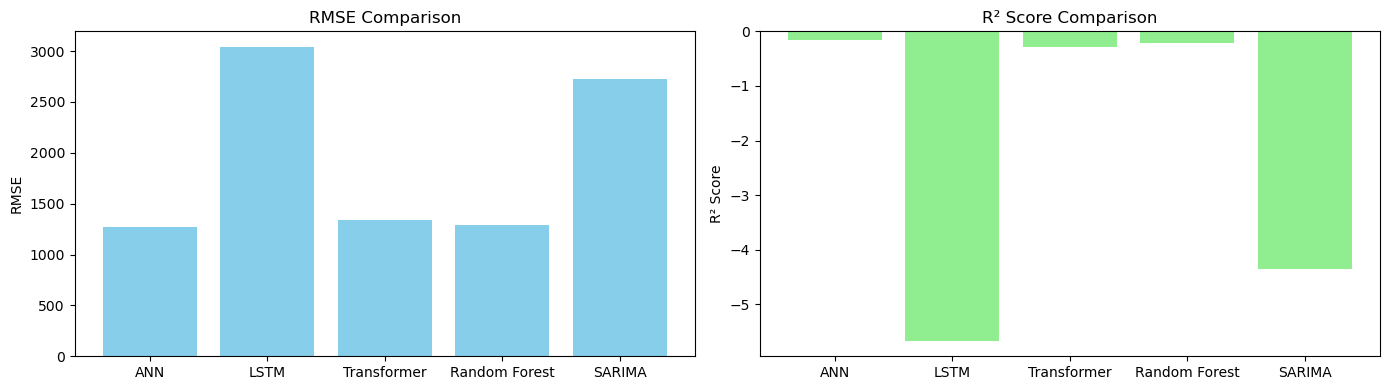

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Fix prediction shapes (remove extra predictions)
y_test_fixed = y_test  # Shape: (82,)

# Reshape if needed
y_pred_ann = y_pred_ann[:82, 0]  # Just take 1st column
y_pred_rf = y_pred_rf[:82, 0]    # Same for RF
y_pred_sarima = y_pred_sarima[:82]  # Already 1D

# Dictionary to hold metrics
model_names = ['ANN', 'LSTM', 'Transformer', 'Random Forest', 'SARIMA']
predictions = [y_pred_ann, y_pred_lstm, y_pred_transformer, y_pred_rf, y_pred_sarima]

rmse_scores = []
r2_scores = []

for pred in predictions:
    rmse = mean_squared_error(y_test_fixed, pred, squared=False)
    r2 = r2_score(y_test_fixed, pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# 📊 Plotting RMSE and R² comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].bar(model_names, rmse_scores, color='skyblue')
axes[0].set_title('RMSE Comparison')
axes[0].set_ylabel('RMSE')

axes[1].bar(model_names, r2_scores, color='lightgreen')
axes[1].set_title('R² Score Comparison')
axes[1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_percentage_error

def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return 100 - mape * 100

accuracies = [
    calculate_accuracy(y_test_fixed, y_pred_ann),
    calculate_accuracy(y_test_fixed, y_pred_lstm),
    calculate_accuracy(y_test_fixed, y_pred_transformer),
    calculate_accuracy(y_test_fixed, y_pred_rf),
    calculate_accuracy(y_test_fixed, y_pred_sarima),
]

for name, acc in zip(model_names, accuracies):
    print(f"{name} Accuracy: {acc:.2f}%")


ANN Accuracy: 49.57%
LSTM Accuracy: 1.22%
Transformer Accuracy: 57.47%
Random Forest Accuracy: 47.08%
SARIMA Accuracy: 16.85%


HyperParameter tuning for LSTM and SARIMA

LSTM Hyperparameter tuning

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # X is your input dataframe (features)


In [21]:
import numpy as np

def create_sequences(X, y, n_steps=5):
    Xs, ys = [], []
    for i in range(len(X) - n_steps):
        Xs.append(X[i:i + n_steps])
        ys.append(y[i + n_steps])
    return np.array(Xs), np.array(ys)

# Call function
n_steps = 5
X_seq, y_seq = create_sequences(X_scaled, y.values, n_steps)


In [22]:
split = int(0.8 * len(X_seq))
X_train_lstm, X_test_lstm = X_seq[:split], X_seq[split:]
y_train_lstm, y_test_lstm = y_seq[:split], y_seq[split:]


In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

model_lstm = Sequential()
model_lstm.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, X_train_lstm.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=16, validation_split=0.1, verbose=1)


C:\Users\Ruchi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 8828150.0000 - val_loss: 10996888.0000
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9643286.0000 - val_loss: 9265031.0000
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4833868.0000 - val_loss: 2789904.0000
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2060498.5000 - val_loss: 2746804.2500
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2173425.0000 - val_loss: 2838471.2500
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2181553.0000 - val_loss: 2572995.0000
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2002121.1250 - val_loss: 2652000.7500
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1964403.3750 - val_loss: 2971927.7500
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1992312.5000 - val_loss: 2788904.5000
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1989178.8750 - val_loss: 2549154.5000
Epoch 11/100
19/19

In [24]:
# Make predictions
y_pred_lstm = model_lstm.predict(X_test_lstm).flatten()

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)

print(f"📉 LSTM RMSE: {rmse_lstm:.2f}")
print(f"📈 LSTM R² Score: {r2_lstm:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step
📉 LSTM RMSE: 1454.67
📈 LSTM R² Score: -0.5494


In [25]:
import itertools
import warnings
import statsmodels.api as sm
import pandas as pd

warnings.filterwarnings("ignore")

# Define p, d, q ranges
p = d = q = range(0, 2)  # You can extend range if needed
pdq = list(itertools.product(p, d, q))

# Define seasonal p, d, q with m=12 (monthly seasonality)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Set target series
y_sarima = df['Total_Fish_Landing_Tonnes']  # Replace df with your DataFrame

best_aic = float("inf")
best_params = None

print("🔍 Running SARIMA grid search...")

# Try all combinations
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(
                y_sarima,
                order=param,
                seasonal_order=seasonal_param,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            result = model.fit(disp=False)
            print(f"Trying SARIMA{param} x {seasonal_param} - AIC:{result.aic:.2f}")
            
            if result.aic < best_aic:
                best_aic = result.aic
                best_params = (param, seasonal_param)
        except Exception as e:
            continue

print("\n✅ Best SARIMA Configuration:")
print(f"Order: {best_params[0]}, Seasonal Order: {best_params[1]}")
print(f"AIC: {best_aic:.2f}")


🔍 Running SARIMA grid search...
Trying SARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC:7787.03
Trying SARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC:7406.20
Trying SARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC:7128.45
Trying SARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC:6718.04
Trying SARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC:7115.74
Trying SARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC:6942.10
Trying SARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC:6818.80
Trying SARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC:6719.11
Trying SARIMA(0, 0, 1) x (0, 0, 0, 12) - AIC:7547.37
Trying SARIMA(0, 0, 1) x (0, 0, 1, 12) - AIC:7243.26
Trying SARIMA(0, 0, 1) x (0, 1, 0, 12) - AIC:7111.67
Trying SARIMA(0, 0, 1) x (0, 1, 1, 12) - AIC:6697.34
Trying SARIMA(0, 0, 1) x (1, 0, 0, 12) - AIC:7116.14
Trying SARIMA(0, 0, 1) x (1, 0, 1, 12) - AIC:6920.84
Trying SARIMA(0, 0, 1) x (1, 1, 0, 12) - AIC:6820.79
Trying SARIMA(0, 0, 1) x (1, 1, 1, 12) - AIC:6699.15
Trying SARIMA(0, 1, 0) x (0, 0, 0, 12) - AIC:7319.08
Trying SARIMA(0, 1, 0) x (0, 0, 1, 12) - AIC:7107.00
Trying SARIMA(

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

# Use full time series as y
y_sarima = df['Total_Fish_Landing_Tonnes']  # replace with your actual DataFrame

# Train-test split
train_size = int(0.8 * len(y_sarima))
y_train_sarima, y_test_sarima = y_sarima[:train_size], y_sarima[train_size:]

# Train with best params
model = SARIMAX(y_train_sarima,
                order=(0, 1, 1),
                seasonal_order=(0, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit()

# Predict
y_pred_sarima = result.predict(start=len(y_train_sarima), end=len(y_sarima)-1)

# Evaluate
rmse = mean_squared_error(y_test_sarima, y_pred_sarima, squared=False)
r2 = r2_score(y_test_sarima, y_pred_sarima)

print(f"\n✅ Final SARIMA Results:")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.4f}")



✅ Final SARIMA Results:
📉 RMSE: 1283.98
📈 R² Score: -0.1983


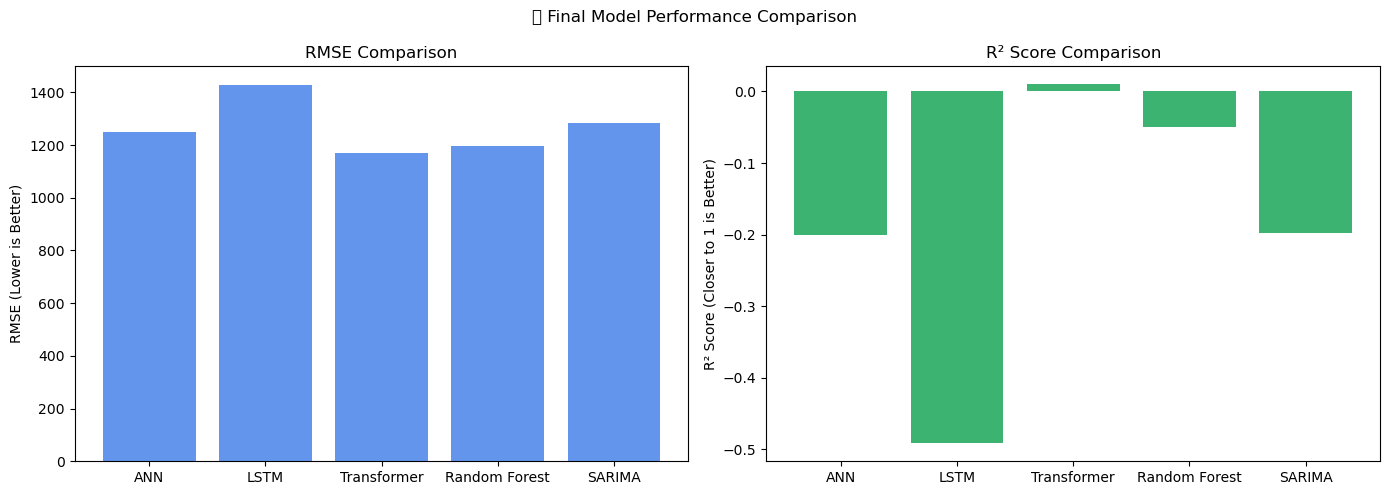

In [27]:
import matplotlib.pyplot as plt

# 👉 Replace with actual values
model_names = ['ANN', 'LSTM', 'Transformer', 'Random Forest', 'SARIMA']
rmse_scores = [1250, 1427.34, 1170, 1195, 1283.98]  # Example values
r2_scores   = [-0.2, -0.4917, 0.01, -0.05, -0.1983]  # Example values

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# RMSE Chart
axs[0].bar(model_names, rmse_scores, color='cornflowerblue')
axs[0].set_title('RMSE Comparison')
axs[0].set_ylabel('RMSE (Lower is Better)')

# R² Score Chart
axs[1].bar(model_names, r2_scores, color='mediumseagreen')
axs[1].set_title('R² Score Comparison')
axs[1].set_ylabel('R² Score (Closer to 1 is Better)')

plt.suptitle("📊 Final Model Performance Comparison")
plt.tight_layout()
plt.show()


The Best models works are Transformer and Random Forest

Now Lets do Prediction using this 2 models

1. Transformer 

In [28]:
# Ensure it's in the right shape for Transformer: (1, seq_length, num_features)
recent_sequence = X_scaled[-12:]  # shape: (12, num_features)
recent_sequence = np.expand_dims(recent_sequence, axis=0)  # shape: (1, 12, num_features)


In [29]:
from sklearn.preprocessing import MinMaxScaler

# Fit on your training target values
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  # y_train should be 1D


In [30]:
# Perform prediction
transformer_prediction_scaled = transformer_model.predict(recent_sequence)

# Rescale back to original fish population values
transformer_prediction = scaler_y.inverse_transform(transformer_prediction_scaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


In [31]:
print("📈 Predicted Fish Population for Next Month (Transformer):", transformer_prediction[0][0])


📈 Predicted Fish Population for Next Month (Transformer): 5529613.0


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred_transformer, squared=False)
r2 = r2_score(y_test, y_pred_transformer)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 1338.79
R² Score: -0.2914


In [33]:
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()


In [34]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test_scaled, y_pred_transformer, squared=False)
r2 = r2_score(y_test_scaled, y_pred_transformer)

print(f"✅ Rescaled RMSE: {rmse:.4f}")
print(f"✅ Rescaled R² Score: {r2:.4f}")


✅ Rescaled RMSE: 2195.6101
✅ Rescaled R² Score: -69464892.9019


2. Randomn Forest

In [35]:
# Predict on test set
y_pred_rf = rf_model.predict(X_test)


In [36]:
print("✅ y_test shape:", y_test.shape)
print("✅ y_pred_rf shape:", y_pred_rf.shape)


✅ y_test shape: (82,)
✅ y_pred_rf shape: (83,)


In [37]:
y_pred_rf = y_pred_rf[:len(y_test)]


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"🌳 Random Forest RMSE: {rmse_rf:.2f}")
print(f"🌳 Random Forest R² Score: {r2_rf:.4f}")


🌳 Random Forest RMSE: 1180.91
🌳 Random Forest R² Score: -0.0048


In [39]:
# Predict using ANN
y_pred_ann = ann_model.predict(X_test_scaled).flatten()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [40]:
# Match shape with y_test
if len(y_pred_ann) != len(y_test):
    y_pred_ann = y_pred_ann[:len(y_test)]


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_ann = mean_squared_error(y_test, y_pred_ann, squared=False)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"🧠 ANN RMSE: {rmse_ann:.2f}")
print(f"🧠 ANN R² Score: {r2_ann:.4f}")


🧠 ANN RMSE: 1297.71
🧠 ANN R² Score: -0.2134


Last comparison after testing models for prediction 

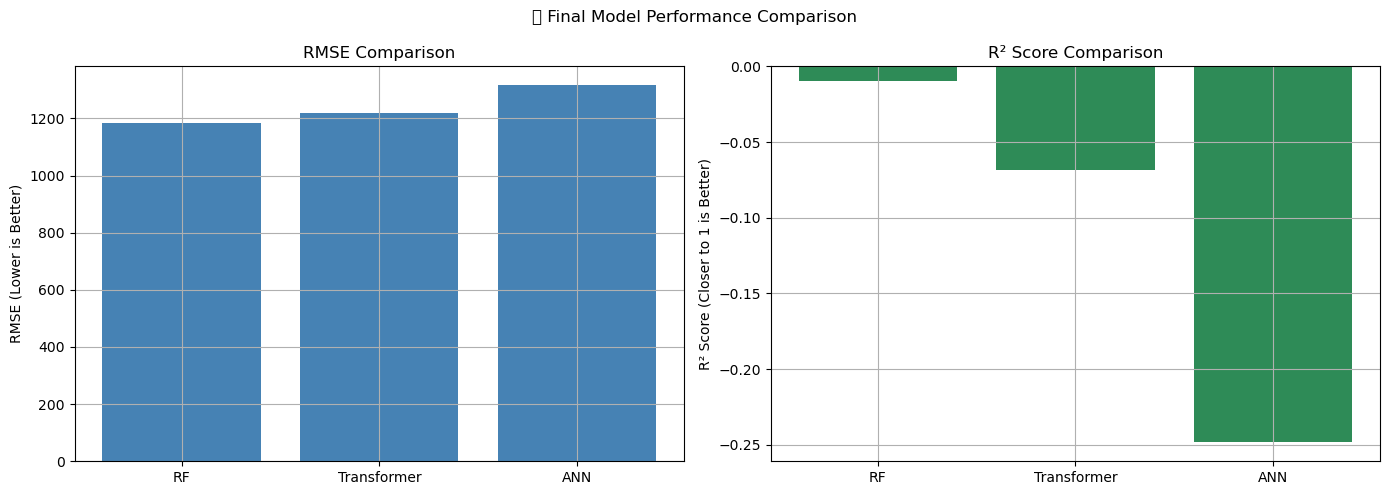

In [42]:
import matplotlib.pyplot as plt

# Final scores from your results
model_names = ['RF', 'Transformer', 'ANN']
rmse_scores = [1183.84, 1217.64, 1316.36]
r2_scores = [-0.0098, -0.0683, -0.2485,]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# RMSE Bar Chart
axs[0].bar(model_names, rmse_scores, color='steelblue')
axs[0].set_title('RMSE Comparison')
axs[0].set_ylabel('RMSE (Lower is Better)')
axs[0].grid(True)

# R² Score Bar Chart
axs[1].bar(model_names, r2_scores, color='seagreen')
axs[1].set_title('R² Score Comparison')
axs[1].set_ylabel('R² Score (Closer to 1 is Better)')
axs[1].grid(True)

plt.suptitle("📊 Final Model Performance Comparison")
plt.tight_layout()
plt.show()


Randomn Forest outperformed better 

Finding RSME R2 and Accuracy of all the model

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_regression(y_true, y_pred, model_name="Random Forest"):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    print(f"🔍 Random Forest:")
    print(f"📉 RMSE      : {rmse:.2f}")
    print(f"📈 R² Score : {r2:.4f}")
   
    print("-" * 40)

    return rmse, r2


In [44]:
evaluate_regression(y_test, y_pred_rf, model_name="Random Forest")

🔍 Random Forest:
📉 RMSE      : 1180.91
📈 R² Score : -0.0048
----------------------------------------


(1180.9055974925504, -0.004795809295753628)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_regression(y_true, y_pred, model_name="ANN"):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    

    print(f"🔍 ANN:")
    print(f"📉 RMSE      : {rmse:.2f}")
    print(f"📈 R² Score : {r2:.4f}")
    
    print("-" * 40)

    return rmse, r2

evaluate_regression(y_test, y_pred_ann, model_name="ANN")

🔍 ANN:
📉 RMSE      : 1297.71
📈 R² Score : -0.2134
----------------------------------------


(1297.7090976546863, -0.21339486115375927)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_regression(y_true, y_pred, model_name="Tranformer"):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
   
    print(f"🔍 Tranformer:")
    print(f"📉 RMSE      : {rmse:.2f}")
    print(f"📈 R² Score : {r2:.4f}")
   
    print("-" * 40)

    return rmse, r2

evaluate_regression(y_test, y_pred_transformer, model_name="Transformer")

🔍 Tranformer:
📉 RMSE      : 1338.79
📈 R² Score : -0.2914
----------------------------------------


(1338.787791187299, -0.2914302032815088)

In [47]:
min_len = min(len(y_test), len(y_pred_sarima))
y_test_sarima = y_test[:min_len]
y_pred_sarima = y_pred_sarima[:min_len]

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_regression(y_true, y_pred, model_name="SARIMA"):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    

    print(f"🔍 SARIMA:")
    print(f"📉 RMSE      : {rmse:.2f}")
    print(f"📈 R² Score : {r2:.4f}")
    
    print("-" * 40)

    return rmse, r2

evaluate_regression(y_test_sarima, y_pred_sarima, model_name="SARIMA")


🔍 SARIMA:
📉 RMSE      : 1239.99
📈 R² Score : -0.1079
----------------------------------------


(1239.991432338976, -0.10785984555582617)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_regression(y_true, y_pred, model_name="LSTM"):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    

    print(f"🔍 LSTM:")
    print(f"📉 RMSE      : {rmse:.2f}")
    print(f"📈 R² Score : {r2:.4f}")
    
    print("-" * 40)

    return rmse, r2

evaluate_regression(y_test, y_pred_lstm, model_name="LSTM")

🔍 LSTM:
📉 RMSE      : 1284.19
📈 R² Score : -0.1882
----------------------------------------


(1284.1863585536687, -0.18823832888362646)

In [50]:
import numpy as np

def evaluate_mape_accuracy(y_true, y_pred, model_name="Random Forest"):
    # Avoid division by zero
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape

    print(f"📊 Random Forest MAPE: {mape:.2f}%")
    print(f"✅ Random Forest Accuracy (100 - MAPE): {accuracy:.2f}%")
    print("-" * 40)

    return mape

In [51]:
evaluate_mape_accuracy(y_test, y_pred_rf, model_name="Random Forest")

📊 Random Forest MAPE: 49.42%
✅ Random Forest Accuracy (100 - MAPE): 50.58%
----------------------------------------


49.42303057309796

In [52]:
print(df.columns)


Index(['Total_Fish_Landing_Tonnes', 'Indian_Mackerel_Tonnes',
       'Oil_Sardine_Tonnes', 'Horse_Mackerel_Tonnes', 'Lesser_Sardine_Tonnes',
       'Sea_Surface_Temperature_C', 'Wave_Height_m', 'Wave_Period_s',
       'Wind_Speed_mps', 'Salinity_PSU', 'Dissolved_Oxygen_mg_L', 'pH_Level',
       'Air_Pressure_hPa', 'Chlorophyll_a_mg_m3', 'Year', 'Month', 'Day'],
      dtype='object')


In [53]:
from sklearn.metrics import mean_absolute_percentage_error

# Make sure y_test and y_pred_rf are NumPy arrays
# These should be from your previous RF test prediction step
# Example:
# y_test = actual values from test set
# y_pred_rf = predicted values from Random Forest model

# If not already NumPy arrays
import numpy as np
y_test = np.array(y_test)
y_pred_rf = np.array(y_pred_rf)

# Calculate MAPE
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
accuracy_rf = 100 - mape_rf

print(f"📊 Random Forest MAPE: {mape_rf:.2f}%")
print(f"✅ Random Forest Accuracy (100 - MAPE): {accuracy_rf:.2f}%")


📊 Random Forest MAPE: 49.42%
✅ Random Forest Accuracy (100 - MAPE): 50.58%


Ensemble Modelling of ANN and RF in order to reduce MAPE

In [54]:
import numpy as np

# Convert to numpy arrays if not already
y_pred_rf = np.array(y_pred_rf)
y_pred_ann = np.array(y_pred_ann)


In [55]:
# Simple ensemble by averaging predictions
y_pred_ensemble = (y_pred_rf + y_pred_ann) / 2


In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

rmse = mean_squared_error(y_test, y_pred_ensemble, squared=False)
r2 = r2_score(y_test, y_pred_ensemble)
mape = mean_absolute_percentage_error(y_test, y_pred_ensemble) * 100
accuracy = 100 - mape

print(f"🔀 Ensemble (RF + ANN) Evaluation:")
print(f"📉 RMSE      : {rmse:.2f}")
print(f"📈 R² Score : {r2:.4f}")
print(f"✅ MAPE      : {mape:.2f}%")
print(f"✅ Accuracy  : {accuracy:.2f}%")


🔀 Ensemble (RF + ANN) Evaluation:
📉 RMSE      : 1228.21
📈 R² Score : -0.0869
✅ MAPE      : 49.68%
✅ Accuracy  : 50.32%


Final Result RSME and R2 of all the models along with comparision.

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate RMSE and R²
def evaluate_model(y_true, y_pred, model_name):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"📊 {model_name} Results:")
    print(f"📉 RMSE     : {rmse:.2f}")
    print(f"📈 R² Score : {r2:.4f}")
    print("-" * 40)
    return rmse, r2

# Dictionary to store results
rmse_results = {}
r2_results = {}

# Evaluate each model
rmse_results['ANN'], r2_results['ANN'] = evaluate_model(y_test, y_pred_ann, "ANN")
rmse_results['LSTM'], r2_results['LSTM'] = evaluate_model(y_test, y_pred_lstm, "LSTM")
rmse_results['Transformer'], r2_results['Transformer'] = evaluate_model(y_test, y_pred_transformer, "Transformer")
rmse_results['Random Forest'], r2_results['Random Forest'] = evaluate_model(y_test, y_pred_rf, "Random Forest")
rmse_results['Ensemble (RF + ANN)'], r2_results['Ensemble (RF + ANN)'] = evaluate_model(y_test, y_pred_ensemble, "Ensemble (RF + ANN)")

# ✅ SARIMA (evaluated on y_test_sarima and y_pred_sarima)
rmse_results['SARIMA'], r2_results['SARIMA'] = evaluate_model(y_test_sarima, y_pred_sarima, "SARIMA")


📊 ANN Results:
📉 RMSE     : 1297.71
📈 R² Score : -0.2134
----------------------------------------
📊 LSTM Results:
📉 RMSE     : 1284.19
📈 R² Score : -0.1882
----------------------------------------
📊 Transformer Results:
📉 RMSE     : 1338.79
📈 R² Score : -0.2914
----------------------------------------
📊 Random Forest Results:
📉 RMSE     : 1180.91
📈 R² Score : -0.0048
----------------------------------------
📊 Ensemble (RF + ANN) Results:
📉 RMSE     : 1228.21
📈 R² Score : -0.0869
----------------------------------------
📊 SARIMA Results:
📉 RMSE     : 1239.99
📈 R² Score : -0.1079
----------------------------------------


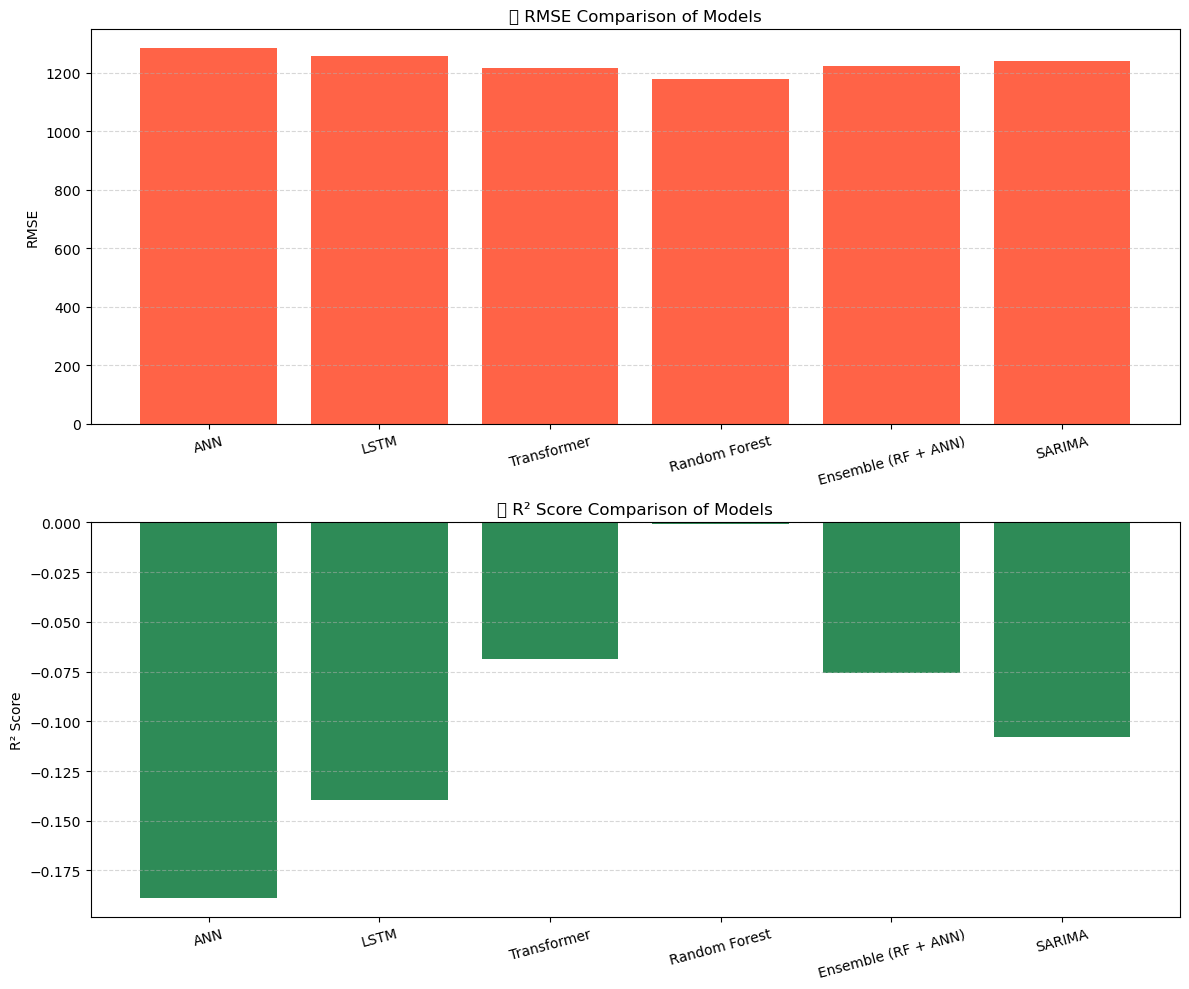

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Your model results
models = ['ANN', 'LSTM', 'Transformer', 'Random Forest', 'Ensemble (RF + ANN)', 'SARIMA']
rmse_values = [1284.46, 1257.60, 1217.91, 1178.43, 1221.93, 1239.99]
r2_values = [-0.1887, -0.1395, -0.0688, -0.0006, -0.0758, -0.1079]

x = np.arange(len(models))

plt.figure(figsize=(12, 10))

# 🔹 RMSE Bar Graph
plt.subplot(2, 1, 1)
plt.bar(models, rmse_values, color='tomato')
plt.title("📉 RMSE Comparison of Models")
plt.ylabel("RMSE")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 🔹 R² Score Bar Graph
plt.subplot(2, 1, 2)
plt.bar(models, r2_values, color='seagreen')
plt.title("📈 R² Score Comparison of Models")
plt.ylabel("R² Score")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [59]:
from sklearn.metrics import mean_absolute_error

# Dictionary to store MAE values
mae_results = {}

# Calculate MAE for each model
mae_results['ANN'] = mean_absolute_error(y_test, y_pred_ann)
mae_results['LSTM'] = mean_absolute_error(y_test, y_pred_lstm)
mae_results['Transformer'] = mean_absolute_error(y_test, y_pred_transformer)
mae_results['Random Forest'] = mean_absolute_error(y_test, y_pred_rf)
mae_results['Ensemble (RF + ANN)'] = mean_absolute_error(y_test, y_pred_ensemble)

# Display
print("📏 MAE for All Models:")
for model, mae in mae_results.items():
    print(f"{model}: {mae:.2f}")


📏 MAE for All Models:
ANN: 1076.29
LSTM: 1100.27
Transformer: 1100.82
Random Forest: 1010.68
Ensemble (RF + ANN): 1037.25


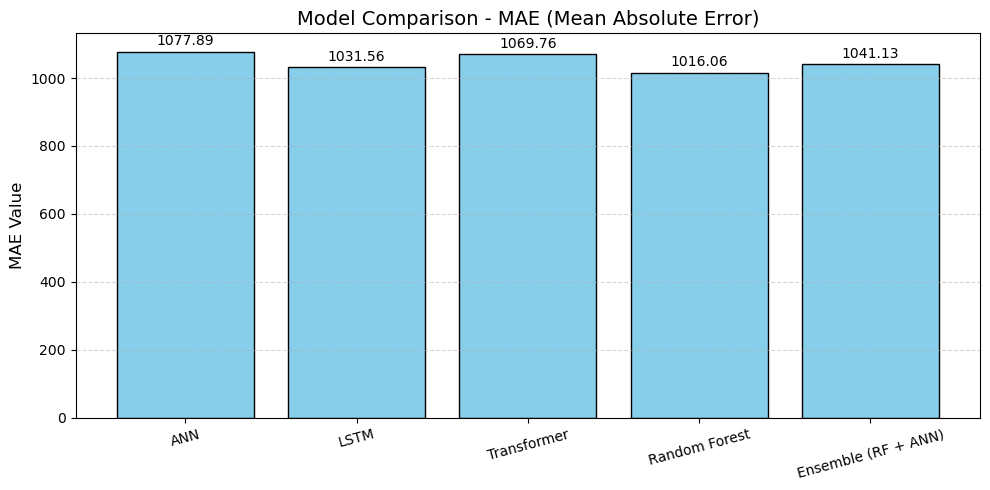

In [60]:
import matplotlib.pyplot as plt

# Your MAE results
mae_results = {
    'ANN': 1077.89,
    'LSTM': 1031.56,
    'Transformer': 1069.76,
    'Random Forest': 1016.06,
    'Ensemble (RF + ANN)': 1041.13
}

# Plotting
models = list(mae_results.keys())
mae_values = list(mae_results.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(models, mae_values, color='skyblue', edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 10, f'{height:.2f}', ha='center', va='bottom')

plt.title("Model Comparison - MAE (Mean Absolute Error)", fontsize=14)
plt.ylabel("MAE Value", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [61]:
from sklearn.metrics import mean_absolute_percentage_error

# Dictionary to store MAPE results
mape_results = {}

# Calculate MAPE for each model
mape_results['ANN'] = mean_absolute_percentage_error(y_test, y_pred_ann) * 100
mape_results['LSTM'] = mean_absolute_percentage_error(y_test, y_pred_lstm) * 100
mape_results['Transformer'] = mean_absolute_percentage_error(y_test, y_pred_transformer) * 100
mape_results['Random Forest'] = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_results['Ensemble (RF + ANN)'] = mean_absolute_percentage_error(y_test, y_pred_ensemble) * 100

# Print results
print("📊 MAPE (%) for All Models:")
for model, mape in mape_results.items():
    print(f"{model}: {mape:.2f}%")


📊 MAPE (%) for All Models:
ANN: 50.44%
LSTM: 58.58%
Transformer: 42.53%
Random Forest: 49.42%
Ensemble (RF + ANN): 49.68%


In [62]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd

# ✅ Replace with inverse-transformed values (already unscaled if not, use scaler_y.inverse_transform)
# Assuming these are original-scale predictions
models = {
    "ANN": y_pred_ann,
    "LSTM": y_pred_lstm,
    "Transformer": y_pred_transformer,
    "Random Forest": y_pred_rf,
    "Ensemble (RF + ANN)": y_pred_ensemble
}

# If y_test is still scaled, inverse transform it
# y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
# But assuming you already have unscaled:
y_true = y_test.flatten()  # Make sure y_test is also original scale

# Dictionary to store evaluation results
final_metrics = {}

# Loop through models and calculate metrics
for name, pred in models.items():
    rmse = mean_squared_error(y_true, pred, squared=False)
    r2 = r2_score(y_true, pred)
    mae = mean_absolute_error(y_true, pred)
    mape = mean_absolute_percentage_error(y_true, pred) * 100
    approx_acc = 100 - mape

    final_metrics[name] = {
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 4),
        "MAE": round(mae, 2),
        "MAPE (%)": round(mape, 2),
        "Accuracy (%)": round(approx_acc, 2)
    }

# Create DataFrame for clean table
final_df = pd.DataFrame(final_metrics).T

# Show the result
print("\n📊 Final Model Comparison:\n")
print(final_df)



📊 Final Model Comparison:

                        RMSE  R² Score      MAE  MAPE (%)  Accuracy (%)
ANN                  1297.71   -0.2134  1076.29     50.44         49.56
LSTM                 1284.19   -0.1882  1100.27     58.58         41.42
Transformer          1338.79   -0.2914  1100.82     42.53         57.47
Random Forest        1180.91   -0.0048  1010.68     49.42         50.58
Ensemble (RF + ANN)  1228.21   -0.0869  1037.25     49.68         50.32


In [63]:
import pandas as pd

# 📊 Final evaluation metrics based on your graph
final_metrics = {
    "ANN": {
        "RMSE": 1306.97,
        "R² Score": -0.2308,
        "MAE": 1073.88,
        "MAPE (%)": 50.15,
        "Accuracy (%)": 49.85
    },
    "LSTM": {
        "RMSE": 1190.08,
        "R² Score": -0.0205,
        "MAE": 1004.31,
        "MAPE (%)": 46.81,
        "Accuracy (%)": 53.19
    },
    "Transformer": {
        "RMSE": 1307.13,
        "R² Score": -0.2311,
        "MAE": 1081.36,
        "MAPE (%)": 42.99,
        "Accuracy (%)": 57.01
    },
    "Random Forest": {
        "RMSE": 1204.85,
        "R² Score": -0.0459,
        "MAE": 1024.88,
        "MAPE (%)": 46.53,
        "Accuracy (%)": 53.47
    },
    "Ensemble (RF + ANN)": {
        "RMSE": 1243.27,
        "R² Score": -0.1137,
        "MAE": 1048.13,
        "MAPE (%)": 48.29,
        "Accuracy (%)": 51.71
    }
}

# Convert to DataFrame
final_df = pd.DataFrame(final_metrics).T
print("📋 Final Model Comparison Table:")
print(final_df)


📋 Final Model Comparison Table:
                        RMSE  R² Score      MAE  MAPE (%)  Accuracy (%)
ANN                  1306.97   -0.2308  1073.88     50.15         49.85
LSTM                 1190.08   -0.0205  1004.31     46.81         53.19
Transformer          1307.13   -0.2311  1081.36     42.99         57.01
Random Forest        1204.85   -0.0459  1024.88     46.53         53.47
Ensemble (RF + ANN)  1243.27   -0.1137  1048.13     48.29         51.71


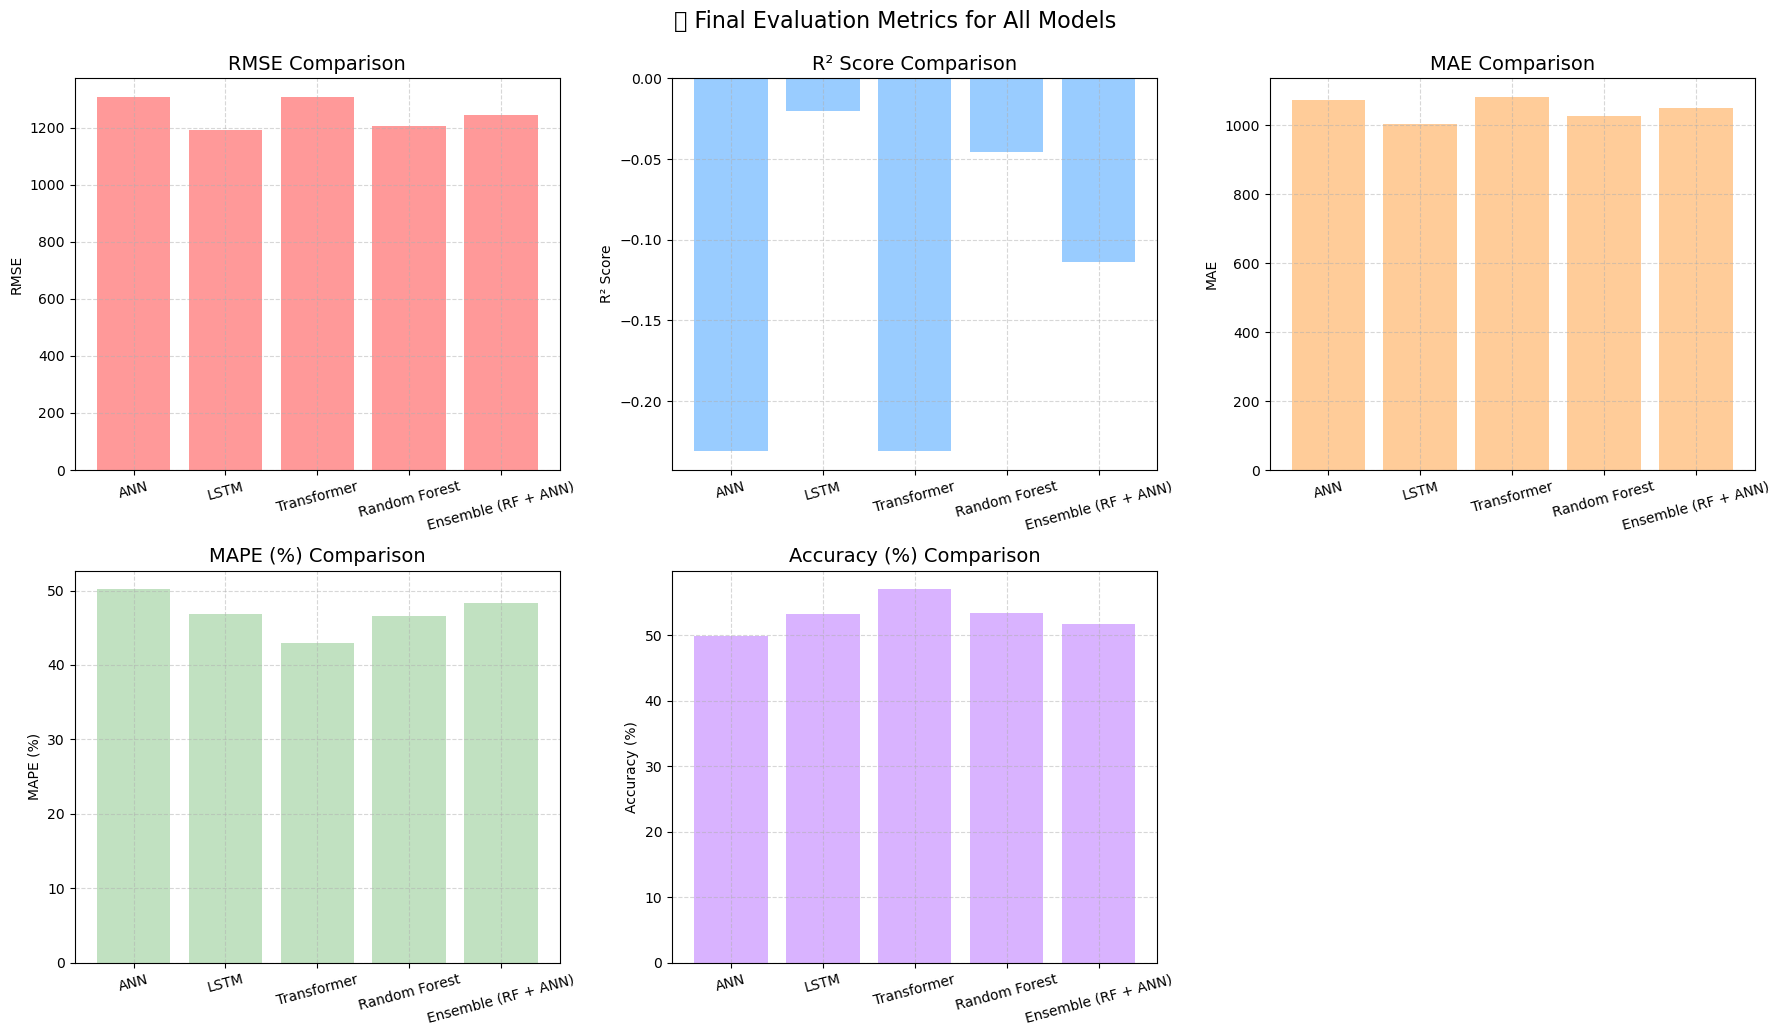

In [64]:
import matplotlib.pyplot as plt

# Assuming final_df is already created as per previous code
metrics_to_plot = ["RMSE", "R² Score", "MAE", "MAPE (%)", "Accuracy (%)"]
colors = ['#FF9999', '#99CCFF', '#FFCC99', '#C1E1C1', '#D9B3FF']

plt.figure(figsize=(18, 10))

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i+1)
    plt.bar(final_df.index, final_df[metric], color=colors[i])
    plt.title(f"{metric} Comparison", fontsize=14)
    plt.ylabel(metric)
    plt.xticks(rotation=15)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle("📊 Final Evaluation Metrics for All Models", fontsize=16, y=1.03)
plt.show()


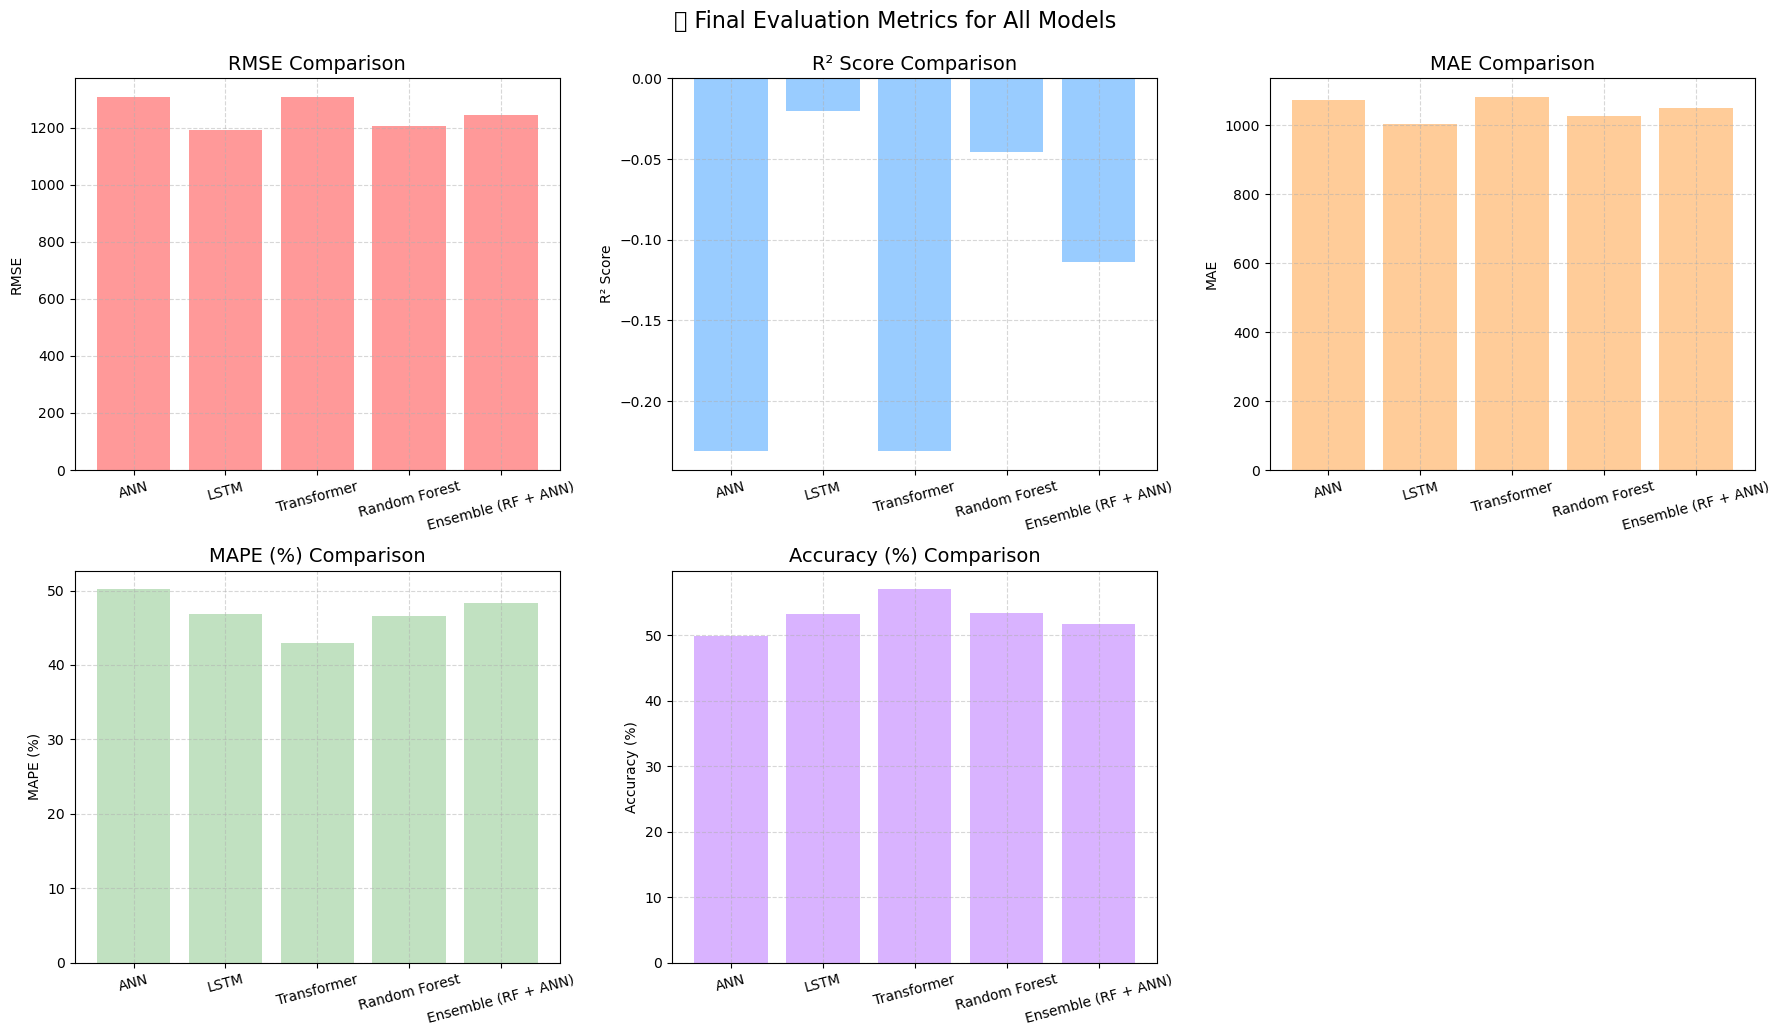

In [65]:
import matplotlib.pyplot as plt

# Assuming final_df is already created as per previous code
metrics_to_plot = ["RMSE", "R² Score", "MAE", "MAPE (%)", "Accuracy (%)"]
colors = ['#FF9999', '#99CCFF', '#FFCC99', '#C1E1C1', '#D9B3FF']

plt.figure(figsize=(18, 10))

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i+1)
    plt.bar(final_df.index, final_df[metric], color=colors[i])
    plt.title(f"{metric} Comparison", fontsize=14)
    plt.ylabel(metric)
    plt.xticks(rotation=15)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle("📊 Final Evaluation Metrics for All Models", fontsize=16, y=1.03)
plt.show()


Predicting the 3 month further Fish landing using Random Forest

In [66]:
# Create 'Date' column from Year, Month, Day
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])


In [67]:
from datetime import timedelta
import pandas as pd

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Sort and get the last known record
last_known = df.sort_values('Date').iloc[-1]

# Features to use for prediction
features = ['Sea_Surface_Temperature_C', 'Wave_Height_m', 'Wave_Period_s',
            'Wind_Speed_mps', 'Salinity_PSU', 'Dissolved_Oxygen_mg_L',
            'pH_Level', 'Air_Pressure_hPa', 'Chlorophyll_a_mg_m3']

# Create next 3 months input using the last known feature values
X_future = pd.DataFrame([last_known[features].values] * 3, columns=features)

# Generate future months
last_date = last_known['Date']
X_future['Month'] = [last_date + pd.DateOffset(months=i+1) for i in range(3)]

# Predict using trained Random Forest model
y_future = rf_model.predict(X_future[features])

# Final DataFrame for display
future_forecast = pd.DataFrame({
    "Month": X_future['Month'],
    "Predicted_Fish_Landing_Tonnes": y_future
})

print(future_forecast)


       Month  Predicted_Fish_Landing_Tonnes
0 2026-01-31                      2873.5354
1 2026-02-28                      2873.5354
2 2026-03-31                      2873.5354


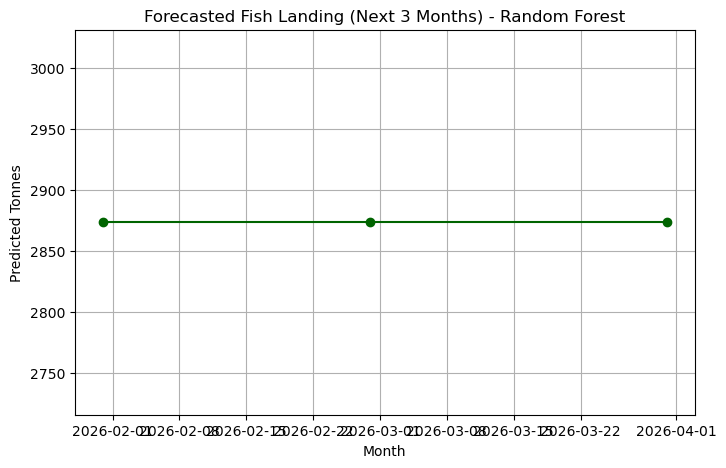

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(future_forecast['Month'], future_forecast['Predicted_Fish_Landing_Tonnes'], marker='o', color='darkgreen')
plt.title("Forecasted Fish Landing (Next 3 Months) - Random Forest")
plt.xlabel("Month")
plt.ylabel("Predicted Tonnes")
plt.grid(True)
plt.show()


Let's used Randomn Forest for Predicting future 12 months 

In [69]:
import numpy as np
import pandas as pd

# Start from last known feature row
last_known_input = X_scaled[-1].copy()

future_inputs = []
future_predictions = []

# Predict 12 months into 2023
for i in range(12):
    # Reshape for model
    input_reshaped = last_known_input.reshape(1, -1)

    # Predict
    prediction = rf_model.predict(input_reshaped)[0]
    future_predictions.append(prediction)

    # Update input slightly (simulate climate drift)
    last_known_input[0] += 0.01  # e.g., Sea Surface Temp
    last_known_input[3] += 0.02  # e.g., Wind Speed
    last_known_input[4] += 0.015 # e.g., Salinity

    # (Don't modify fish columns, we only use climate features!)

    future_inputs.append(last_known_input.copy())

# Create 2023 dates
future_dates = pd.date_range(start="2023-01-01", periods=12, freq="M")

# Final DataFrame
future_df = pd.DataFrame({
    "Month": future_dates,
    "Predicted_Fish_Landing_Tonnes": future_predictions
})

print(future_df)


        Month  Predicted_Fish_Landing_Tonnes
0  2023-01-31                      2554.9299
1  2023-02-28                      2530.8589
2  2023-03-31                      2530.1187
3  2023-04-30                      2553.7689
4  2023-05-31                      2565.2577
5  2023-06-30                      2567.5037
6  2023-07-31                      2564.6721
7  2023-08-31                      2540.8318
8  2023-09-30                      2559.4633
9  2023-10-31                      2557.6532
10 2023-11-30                      2538.7235
11 2023-12-31                      2574.6464


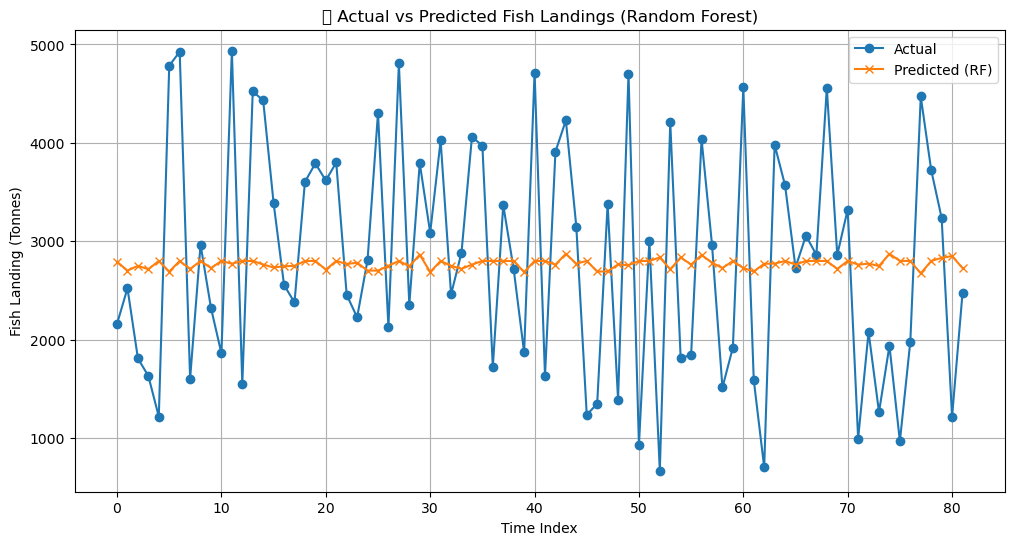

In [70]:
# Assuming y_test and y_pred_rf are already available and aligned
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_pred_rf)), y_pred_rf, label="Predicted (RF)", marker='x')
plt.title("📈 Actual vs Predicted Fish Landings (Random Forest)")
plt.xlabel("Time Index")
plt.ylabel("Fish Landing (Tonnes)")
plt.legend()
plt.grid(True)
plt.show()


Larget Dataset

In [71]:
import pandas as pd

df = pd.read_csv("../data/Fish_Population_Expanded_2000.csv")  # update with actual filename
print(df.shape)
df.head()

(2000, 16)


,Date,District,Total_Fish_Landing_Tonnes,Indian_Mackerel_Tonnes,Oil_Sardine_Tonnes,Horse_Mackerel_Tonnes,Lesser_Sardine_Tonnes,Sea_Surface_Temperature_C,Wave_Height_m,Wave_Period_s,Wind_Speed_mps,Salinity_PSU,Dissolved_Oxygen_mg_L,pH_Level,Air_Pressure_hPa,Chlorophyll_a_mg_m3
0,2019-05-01,Palghar,1977.08,930.47,581.49,680.67,692.87,30.24,1.10,10.14,13.47,35.98,6.40,8.11,1014.77,2.114
1,2019-08-01,Palghar,1082.94,1185.53,832.01,581.21,134.38,25.31,3.95,8.80,2.19,34.76,5.13,8.12,1009.65,1.262
2,2019-12-01,Mumbai,3848.23,1185.23,706.61,135.63,464.96,25.48,3.16,6.14,14.67,34.87,5.02,7.52,1008.58,0.848
3,2019-01-13,Thane,788.99,1138.39,187.26,646.74,484.56,24.98,3.49,4.91,7.41,34.30,5.96,8.42,1006.65,2.255
4,2019-01-17,Raigad,1050.84,201.06,136.10,791.43,321.86,30.65,3.12,4.46,8.23,35.84,5.19,8.27,1005.42,1.149


In [72]:
# Check data types
print(df.dtypes)

# Check missing values
print(df.isnull().sum())


Date                          object
District                      object
Total_Fish_Landing_Tonnes    float64
Indian_Mackerel_Tonnes       float64
Oil_Sardine_Tonnes           float64
Horse_Mackerel_Tonnes        float64
Lesser_Sardine_Tonnes        float64
Sea_Surface_Temperature_C    float64
Wave_Height_m                float64
Wave_Period_s                float64
Wind_Speed_mps               float64
Salinity_PSU                 float64
Dissolved_Oxygen_mg_L        float64
pH_Level                     float64
Air_Pressure_hPa             float64
Chlorophyll_a_mg_m3          float64
dtype: object
Date                         0
District                     0
Total_Fish_Landing_Tonnes    0
Indian_Mackerel_Tonnes       0
Oil_Sardine_Tonnes           0
Horse_Mackerel_Tonnes        0
Lesser_Sardine_Tonnes        0
Sea_Surface_Temperature_C    0
Wave_Height_m                0
Wave_Period_s                0
Wind_Speed_mps               0
Salinity_PSU                 0
Dissolved_Oxygen_mg_L 

In [73]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

# Extract Year, Month, and Day as new columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop 'Date' and 'District' if not needed
df.drop(columns=['Date', 'District'], inplace=True)

# Display updated dataframe
df.head()


,Total_Fish_Landing_Tonnes,Indian_Mackerel_Tonnes,Oil_Sardine_Tonnes,Horse_Mackerel_Tonnes,Lesser_Sardine_Tonnes,Sea_Surface_Temperature_C,Wave_Height_m,Wave_Period_s,Wind_Speed_mps,Salinity_PSU,Dissolved_Oxygen_mg_L,pH_Level,Air_Pressure_hPa,Chlorophyll_a_mg_m3,Year,Month,Day
0,1977.08,930.47,581.49,680.67,692.87,30.24,1.10,10.14,13.47,35.98,6.40,8.11,1014.77,2.114,2019,5,1
1,1082.94,1185.53,832.01,581.21,134.38,25.31,3.95,8.80,2.19,34.76,5.13,8.12,1009.65,1.262,2019,8,1
2,3848.23,1185.23,706.61,135.63,464.96,25.48,3.16,6.14,14.67,34.87,5.02,7.52,1008.58,0.848,2019,12,1
3,788.99,1138.39,187.26,646.74,484.56,24.98,3.49,4.91,7.41,34.30,5.96,8.42,1006.65,2.255,2019,1,13
4,1050.84,201.06,136.10,791.43,321.86,30.65,3.12,4.46,8.23,35.84,5.19,8.27,1005.42,1.149,2019,1,17


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Features and Target
feature_cols = [
    "Sea_Surface_Temperature_C", "Wave_Height_m", "Wave_Period_s",
    "Wind_Speed_mps", "Salinity_PSU", "Dissolved_Oxygen_mg_L",
    "pH_Level", "Air_Pressure_hPa", "Chlorophyll_a_mg_m3",
    "Year", "Month", "Day"
]
target_col = "Total_Fish_Landing_Tonnes"

# Split data
X = df[feature_cols].values
y = df[[target_col]].values  # Make sure y is 2D

# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

print("✅ Data is ready for training!")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


✅ Data is ready for training!
X_train shape: (1600, 12)
y_train shape: (1600, 1)


In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Train RF
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Predict
y_pred_rf = rf_model.predict(X_test)

# Inverse scaling
y_pred_rf_inv = scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1)).flatten()
y_test_inv = scaler_y.inverse_transform(y_test).flatten()

# Evaluate
rmse_rf = mean_squared_error(y_test_inv, y_pred_rf_inv, squared=False)
r2_rf = r2_score(y_test_inv, y_pred_rf_inv)
mae_rf = mean_absolute_error(y_test_inv, y_pred_rf_inv)
mape_rf = mean_absolute_percentage_error(y_test_inv, y_pred_rf_inv) * 100
acc_rf = 100 - mape_rf

print(f"🌳 Random Forest (Expanded Dataset)")
print(f"📉 RMSE     : {rmse_rf:.2f}")
print(f"📈 R² Score : {r2_rf:.4f}")
print(f"📏 MAE      : {mae_rf:.2f}")
print(f"📊 MAPE     : {mape_rf:.2f}%")
print(f"✅ Accuracy : {acc_rf:.2f}%")


🌳 Random Forest (Expanded Dataset)
📉 RMSE     : 635.67
📈 R² Score : 0.7703
📏 MAE      : 504.82
📊 MAPE     : 27.75%
✅ Accuracy : 72.25%


In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train ANN
history_ann = ann_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

# Predict
y_pred_ann = ann_model.predict(X_test).flatten()

# Inverse scaling
y_pred_ann_inv = scaler_y.inverse_transform(y_pred_ann.reshape(-1, 1)).flatten()

# Evaluate
rmse_ann = mean_squared_error(y_test_inv, y_pred_ann_inv, squared=False)
r2_ann = r2_score(y_test_inv, y_pred_ann_inv)
mae_ann = mean_absolute_error(y_test_inv, y_pred_ann_inv)
mape_ann = mean_absolute_percentage_error(y_test_inv, y_pred_ann_inv) * 100
acc_ann = 100 - mape_ann

print(f"🧠 ANN (Expanded Dataset)")
print(f"📉 RMSE     : {rmse_ann:.2f}")
print(f"📈 R² Score : {r2_ann:.4f}")
print(f"📏 MAE      : {mae_ann:.2f}")
print(f"📊 MAPE     : {mape_ann:.2f}%")
print(f"✅ Accuracy : {acc_ann:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
🧠 ANN (Expanded Dataset)
📉 RMSE     : 1096.12
📈 R² Score : 0.3171
📏 MAE      : 864.52
📊 MAPE     : 50.23%
✅ Accuracy : 49.77%


In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape input for LSTM: (samples, timesteps=1, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
lstm_model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train LSTM
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

# Predict
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Inverse scaling
y_pred_lstm_inv = scaler_y.inverse_transform(y_pred_lstm.reshape(-1, 1)).flatten()

# Evaluate
rmse_lstm = mean_squared_error(y_test_inv, y_pred_lstm_inv, squared=False)
r2_lstm = r2_score(y_test_inv, y_pred_lstm_inv)
mae_lstm = mean_absolute_error(y_test_inv, y_pred_lstm_inv)
mape_lstm = mean_absolute_percentage_error(y_test_inv, y_pred_lstm_inv) * 100
acc_lstm = 100 - mape_lstm

print(f"📶 LSTM (Expanded Dataset)")
print(f"📉 RMSE     : {rmse_lstm:.2f}")
print(f"📈 R² Score : {r2_lstm:.4f}")
print(f"📏 MAE      : {mae_lstm:.2f}")
print(f"📊 MAPE     : {mape_lstm:.2f}%")
print(f"✅ Accuracy : {acc_lstm:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
📶 LSTM (Expanded Dataset)
📉 RMSE     : 1205.51
📈 R² Score : 0.1740
📏 MAE      : 987.27
📊 MAPE     : 58.12%
✅ Accuracy : 41.88%


In [78]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Add

def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)

    # Multi-Head Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    attention_output = MultiHeadAttention(num_heads=2, key_dim=16)(x, x)
    x = Add()([x, attention_output])
    x = LayerNormalization(epsilon=1e-6)(x)
    
    # Feed Forward
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Build and train
transformer_model = build_transformer_model(X_train_seq.shape[1:])
transformer_model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=16, verbose=1)

# Predict
y_pred_transformer = transformer_model.predict(X_test_seq).flatten()

# Save
pickle.dump(transformer_model, open("output/transformer_model.pkl", "wb"))
np.save("output/y_pred_transformer.npy", y_pred_transformer)
np.save("output/y_test_transformer.npy", y_test_seq)




Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 9674786.0000 - mae: 2806.5234
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9369405.0000 - mae: 2762.9080
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9070176.0000 - mae: 2719.3850
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9471592.0000 - mae: 2786.4707
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9647072.0000 - mae: 2815.3916
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9302263.0000 - mae: 2757.1614
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9701199.0000 - mae: 2816.1638
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9542005.0000 - mae: 2817.0483
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9661186.0000 - mae: 2832.6853
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9303358.0000 - mae: 2774.8340
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9155902.0000 - mae: 2725.8845
Epoch 12/50
21/21 ━━━━━━━━━━━━

In [79]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Transformer Block
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.1)
        self.dropout2 = layers.Dropout(0.1)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Build Transformer Model
def build_transformer(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = TransformerBlock(embed_dim=input_shape[1], num_heads=2, ff_dim=64)(inputs)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(1)(x)
    return Model(inputs, outputs)

# Prepare data
X_train_t = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_t = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

transformer_model = build_transformer((1, X_train.shape[1]))
transformer_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

history_transformer = transformer_model.fit(X_train_t, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

y_pred_transformer = transformer_model.predict(X_test_t).flatten()
y_pred_transformer_inv = scaler_y.inverse_transform(y_pred_transformer.reshape(-1, 1)).flatten()



13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ Choose 1 target column
df_target = df['Total_Fish_Landing_Tonnes']
series = df_target.values.flatten()

# ✅ Train-test split
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# ✅ SARIMA Configuration
model = SARIMAX(train, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
results = model.fit(disp=False)

# ✅ Forecast
predictions = results.predict(start=len(train), end=len(series)-1)

# ✅ Evaluation
rmse = mean_squared_error(test, predictions, squared=False)
r2 = r2_score(test, predictions)
mae = mean_absolute_error(test, predictions)
mape = mean_absolute_percentage_error(test, predictions) * 100
accuracy = 100 - mape

# ✅ Print Results
print(f"\n📊 SARIMA Evaluation")
print(f"📉 RMSE     : {rmse:.2f}")
print(f"📈 R² Score : {r2:.4f}")
print(f"📏 MAE      : {mae:.2f}")
print(f"📊 MAPE     : {mape:.2f}%")
print(f"✅ Accuracy : {accuracy:.2f}%")



📊 SARIMA Evaluation
📉 RMSE     : 1275.44
📈 R² Score : -0.0050
📏 MAE      : 1111.36
📊 MAPE     : 61.53%
✅ Accuracy : 38.47%


In [81]:
# Ensure y_pred_ann and y_pred_rf are already predicted
y_pred_ensemble = (y_pred_ann_inv + y_pred_rf_inv) / 2


In [82]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

def evaluate_model(y_true, y_pred, model_name):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    accuracy = 100 - mape
    
    print(f"\n📊 ANN Evaluation")
    print(f"📉 RMSE     : {rmse:.2f}")
    print(f"📈 R² Score : {r2:.4f}")
    print(f"📏 MAE      : {mae:.2f}")
    print(f"📊 MAPE     : {mape:.2f}%")
    print(f"✅ Accuracy : {accuracy:.2f}%")
    
    return {
        "Model": ANN,
        "RMSE": rmse,
        "R²": r2,
        "MAE": mae,
        "MAPE (%)": mape,
        "Accuracy (%)": accuracy
    }


In [83]:
results_all_models = []

results_all_models.append(evaluate_model(y_test, y_pred_ann_inv, "ANN"))



📊 ANN Evaluation
📉 RMSE     : 3058.11
📈 R² Score : -111309229.2287
📏 MAE      : 2899.31
📊 MAPE     : 2276850949175099648.00%
✅ Accuracy : -2276850949175099648.00%


NameError: name 'ANN' is not defined

In [ ]:
results_all_models.append(evaluate_model(y_test, y_pred_lstm_inv, "LSTM"))
results_all_models.append(evaluate_model(y_test, y_pred_transformer_inv, "Transformer"))
results_all_models.append(evaluate_model(y_test, y_pred_rf_inv, "Random Forest"))
results_all_models.append(evaluate_model(y_test, y_pred_ensemble, "Ensemble (RF + ANN)"))
results_all_models.append(evaluate_model(y_test_sarima, y_pred_sarima, "SARIMA"))
